In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data= pd.read_csv('diabetes-data.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
data_copy=data.copy(deep=True)

In [ ]:
print(data_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


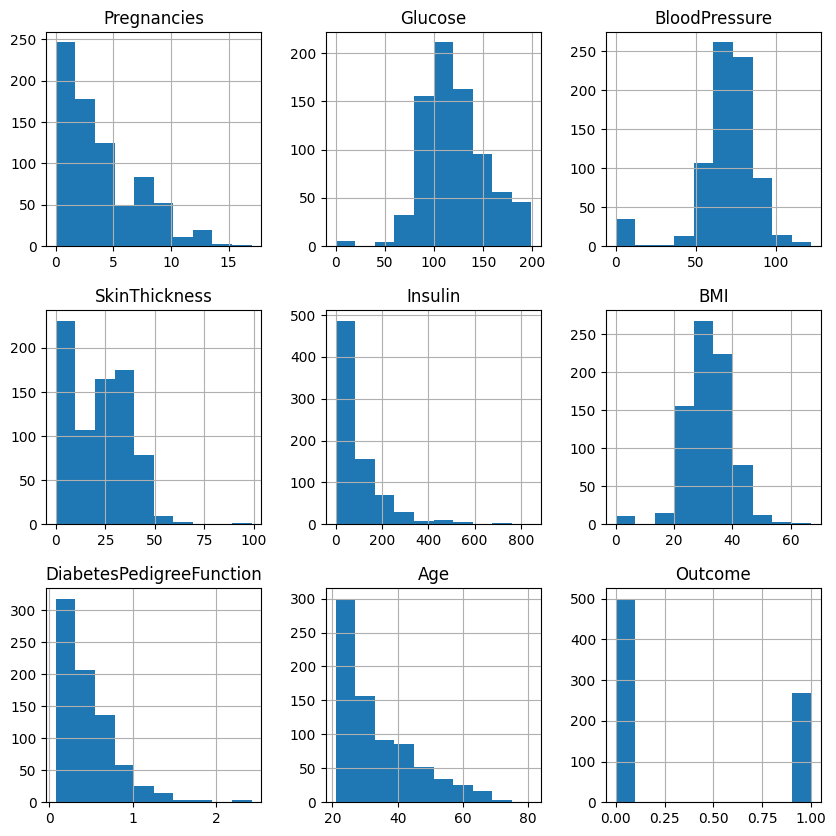

In [ ]:
hplot=data.hist(figsize=(10,10))

In [ ]:
data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean())
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'].fillna(data_copy['BMI'].median())

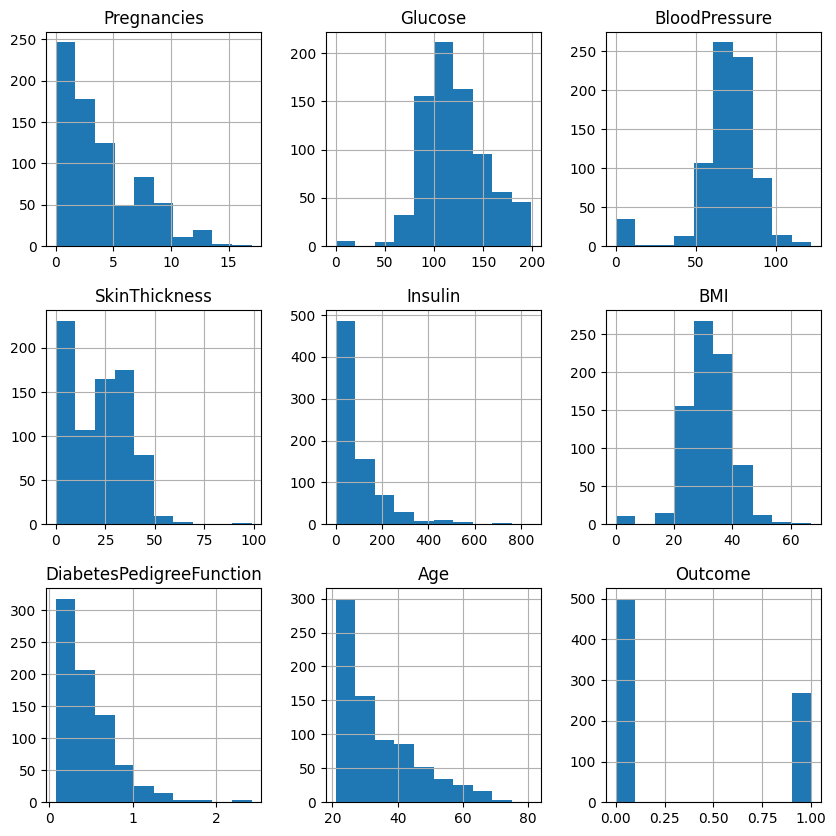

In [ ]:
hplot=data.hist(figsize=(10,10))

In [ ]:
data.shape

(768, 9)

In [ ]:
print(data.Outcome.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


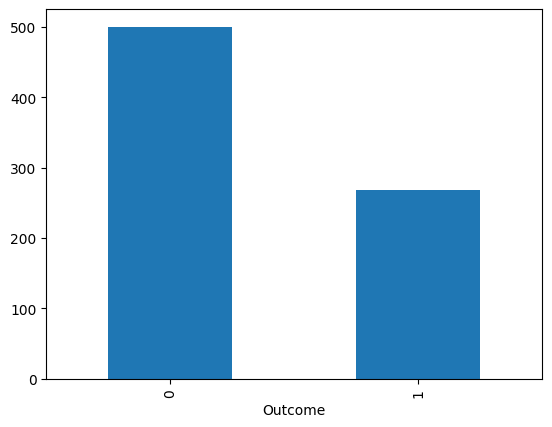

In [ ]:
p=data.Outcome.value_counts().plot(kind="bar")

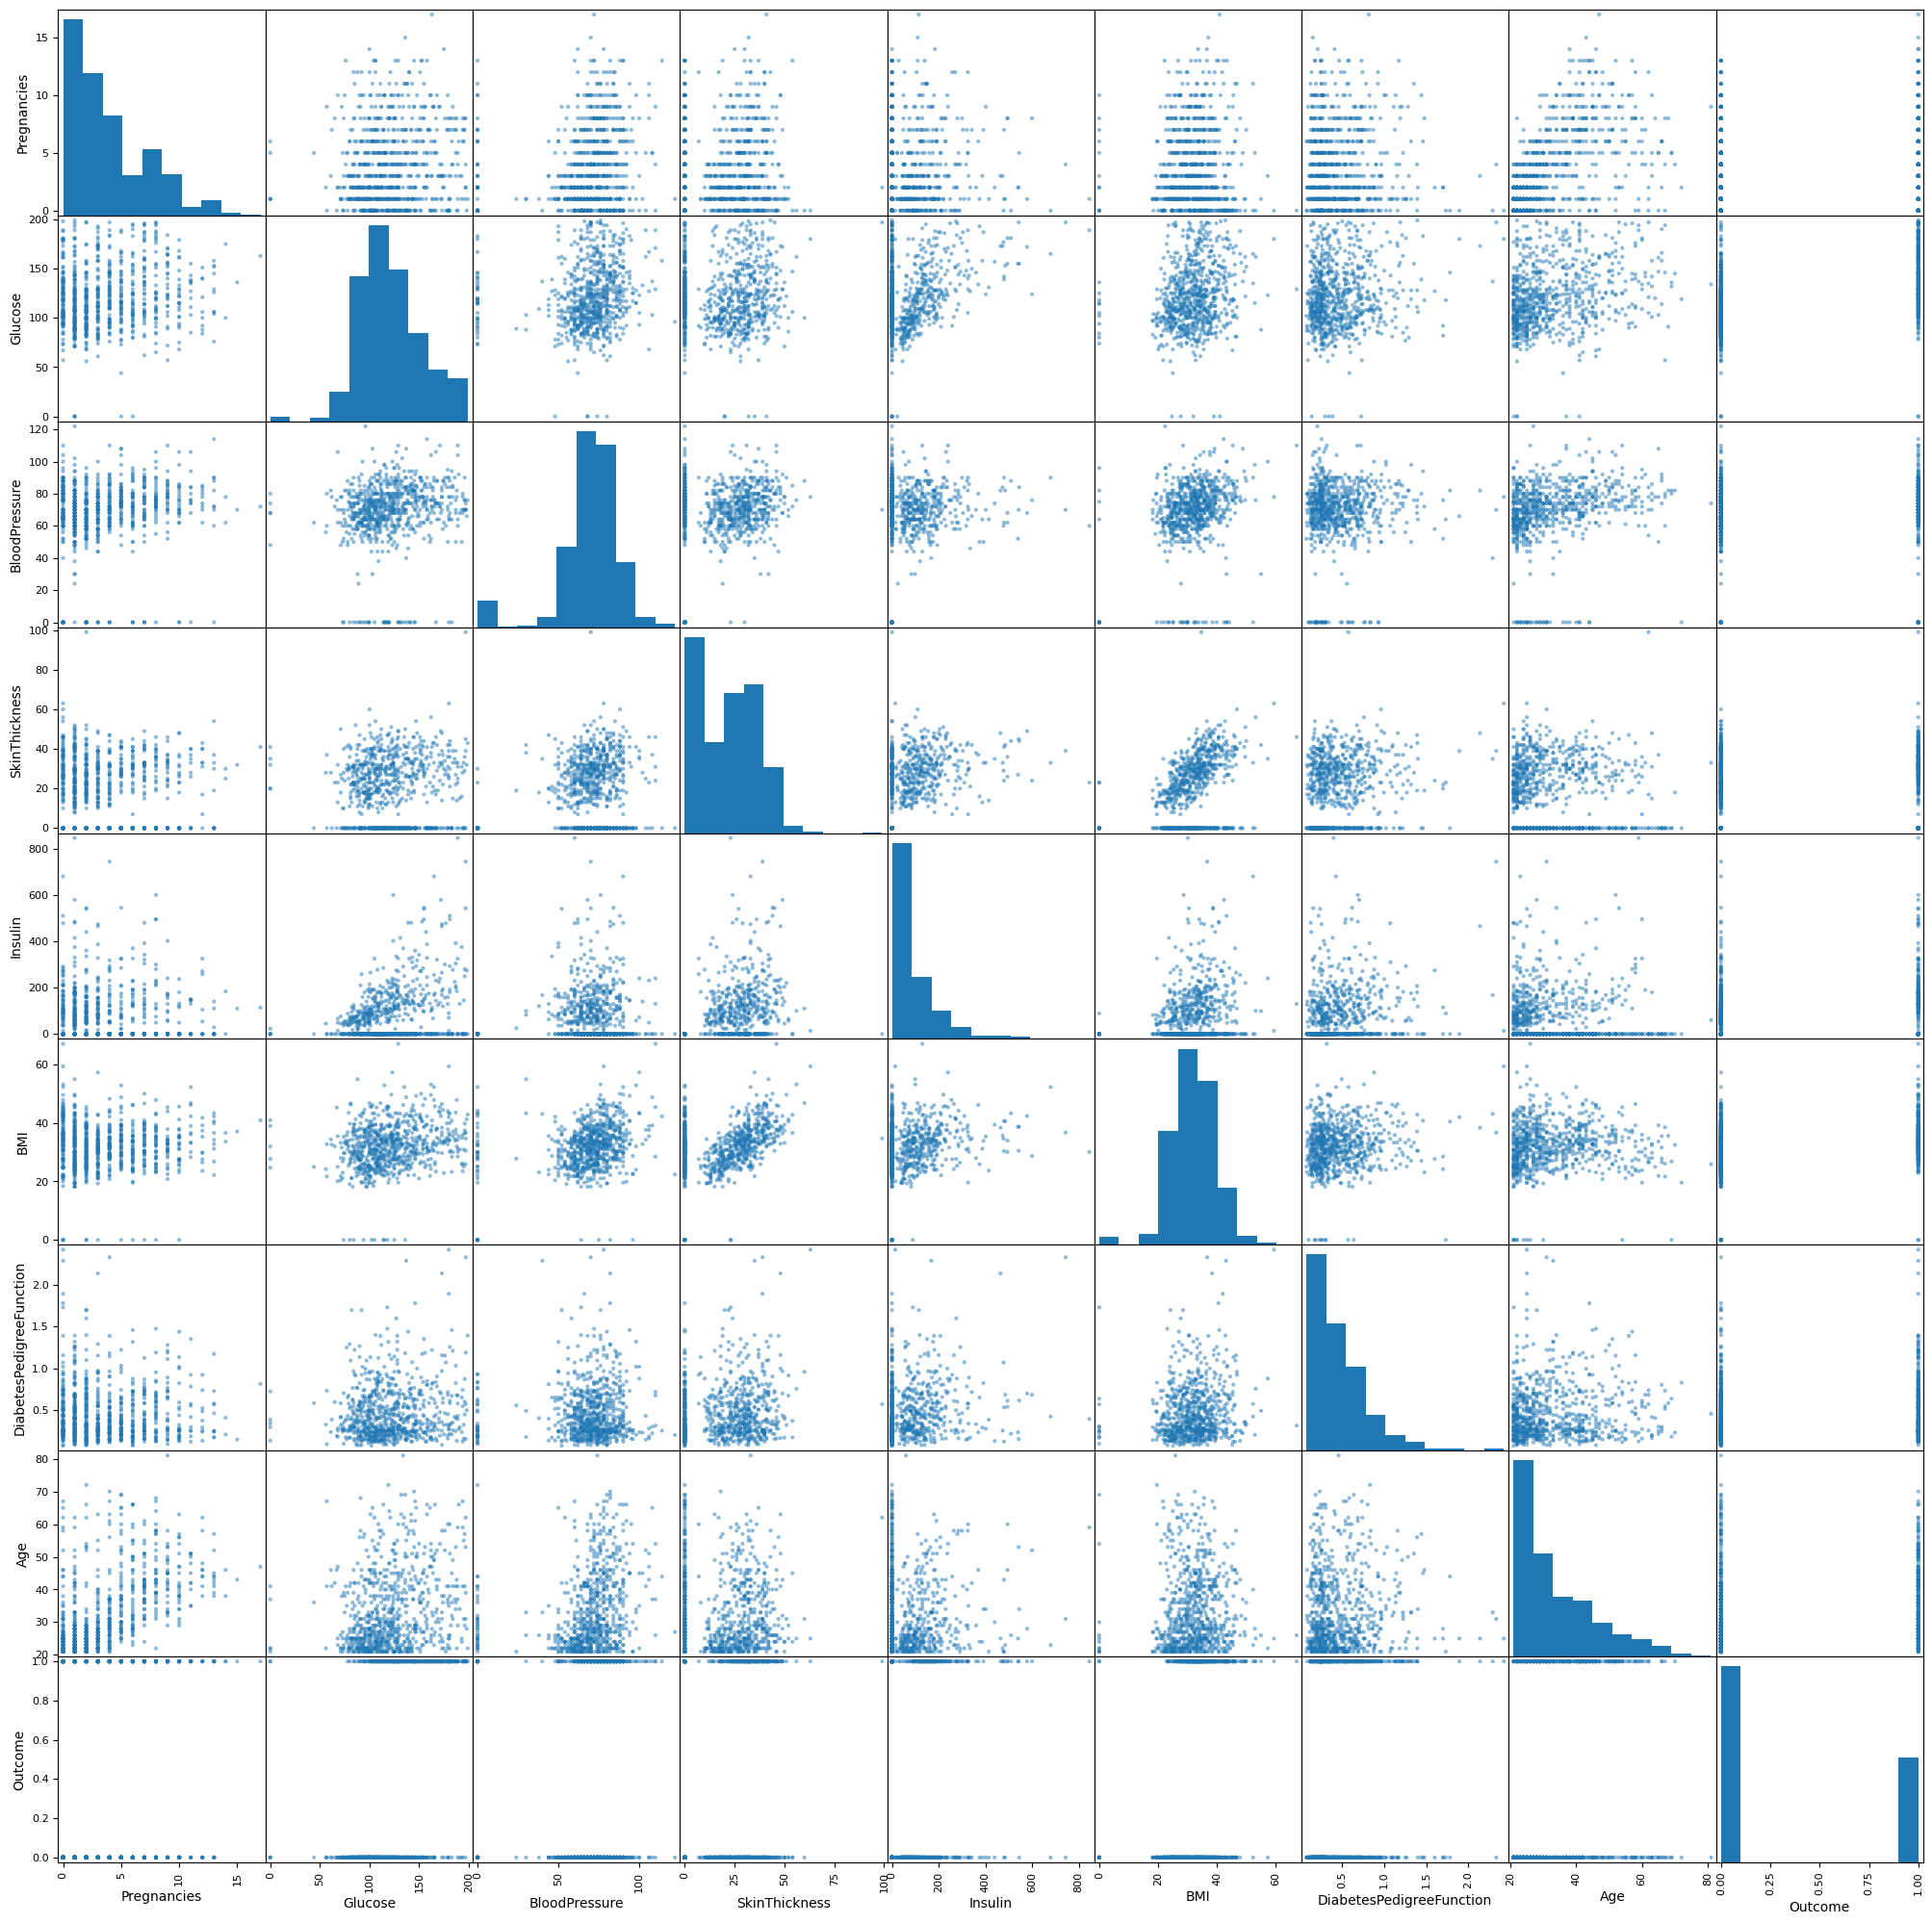

In [ ]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

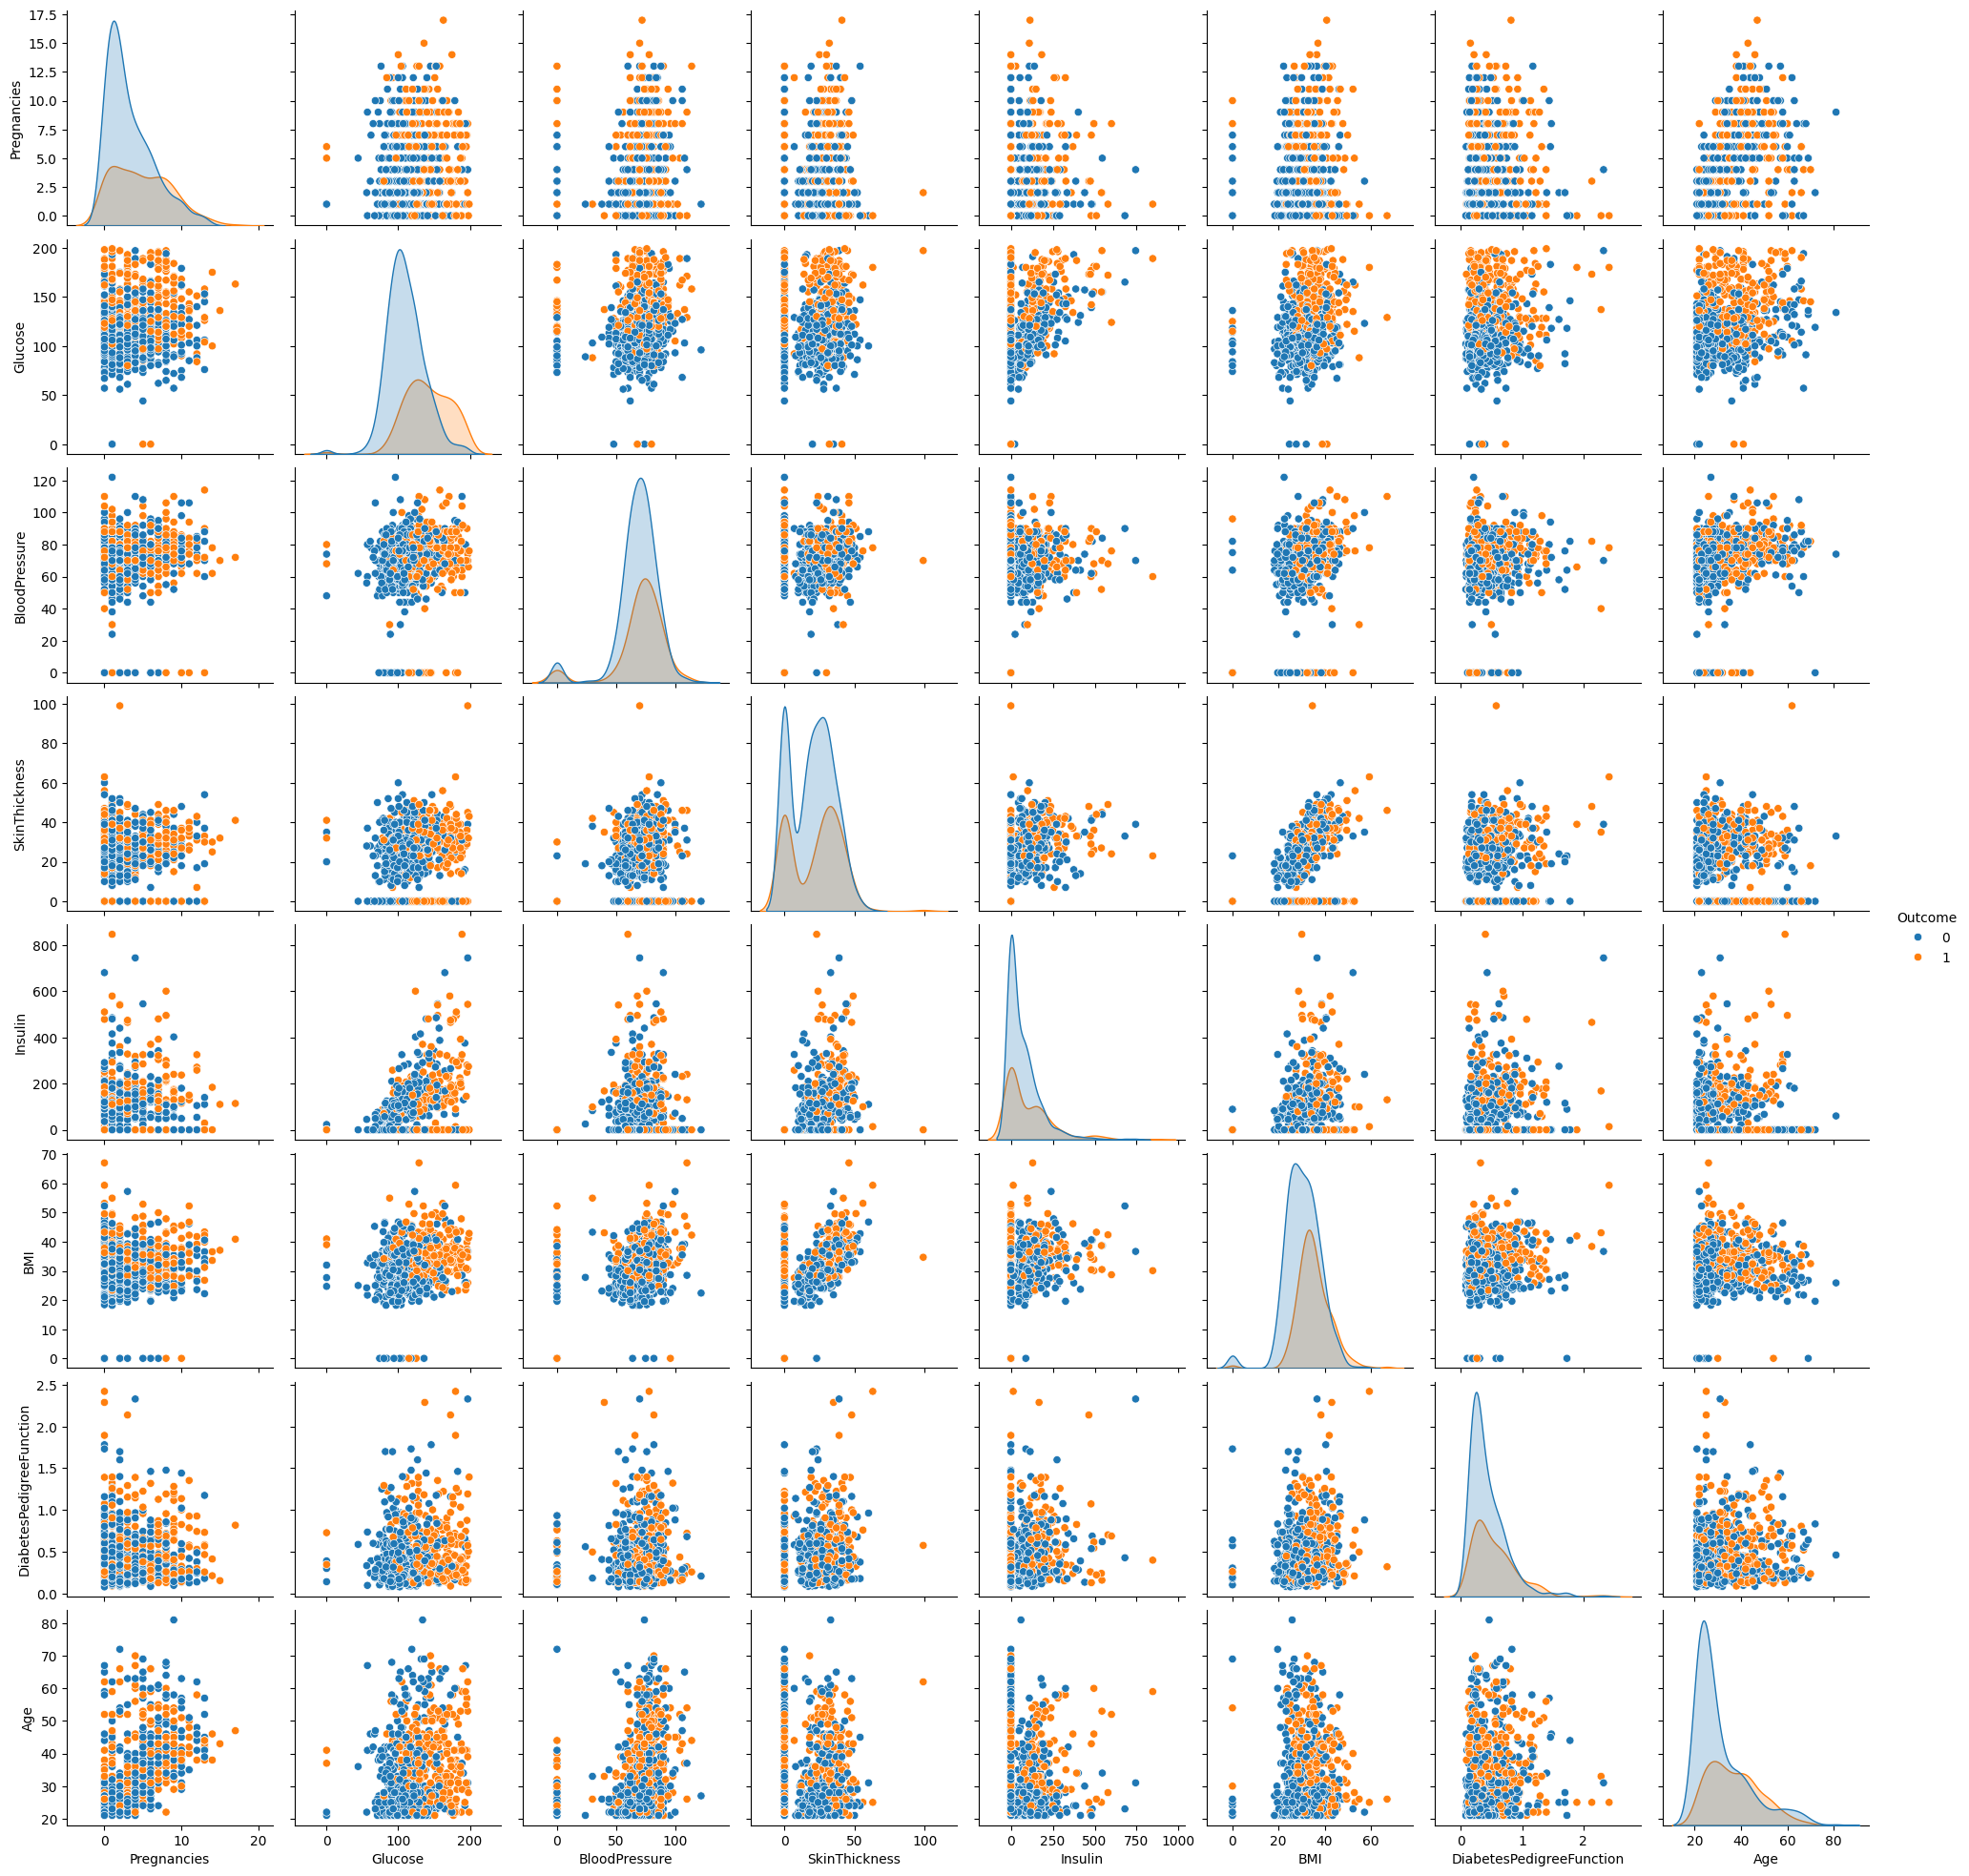

In [ ]:
p=sns.pairplot(data_copy,hue= 'Outcome')

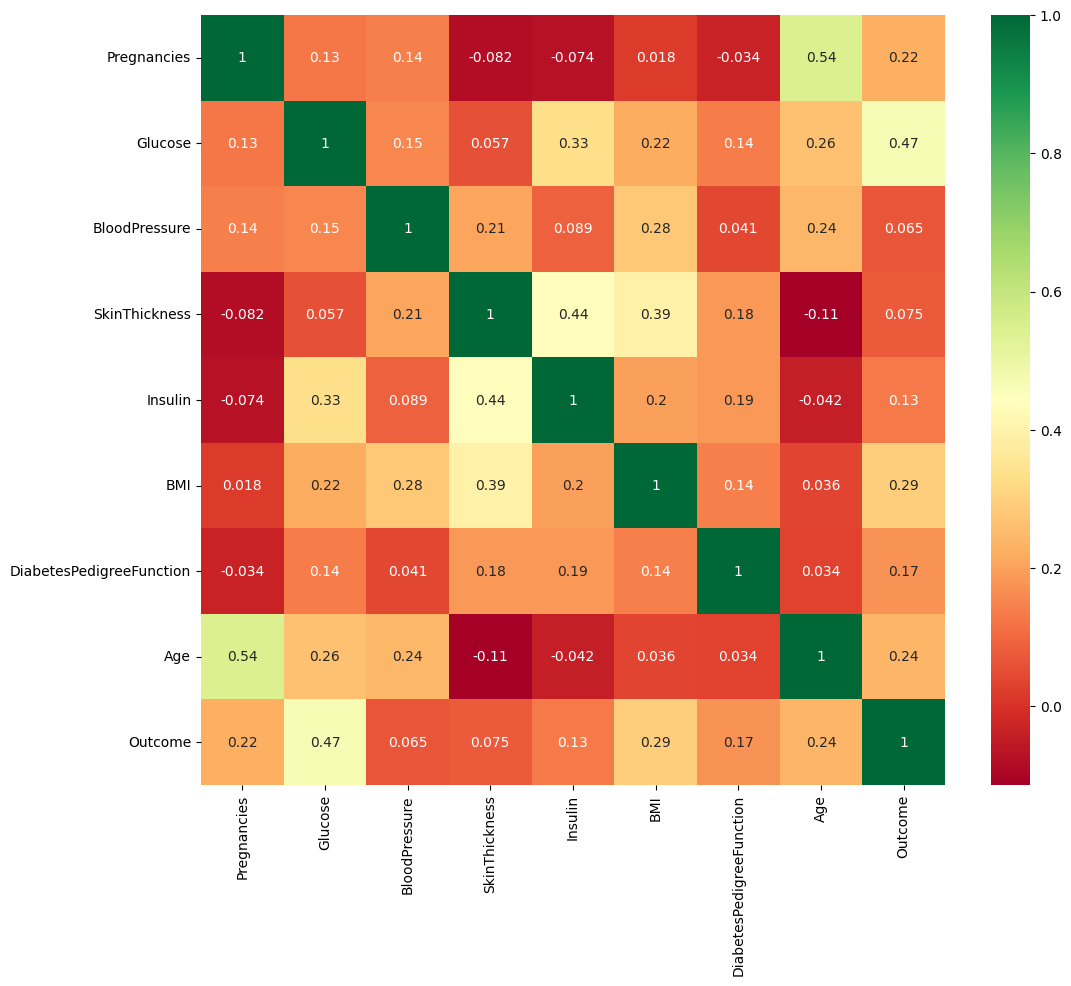

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale_X = StandardScaler()
X = scale_X.fit_transform(data_copy.drop(["Outcome"],axis = 1),)
X = pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
y=data_copy.Outcome

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,
stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
testing_score = []
training_score = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    training_score.append(knn.score(X_train,y_train))
    testing_score.append(knn.score(X_test,y_test))


In [ ]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print('Max training score {} % and k = {}'.format(max_training_score*100,list(map(lambda x:
x+1, train_scores_ind))))

Max training score 100.0 % and k = [1]


In [ ]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x:
x+1, test_scores_ind))))



Max testing score 76.953125 % and k = [11]


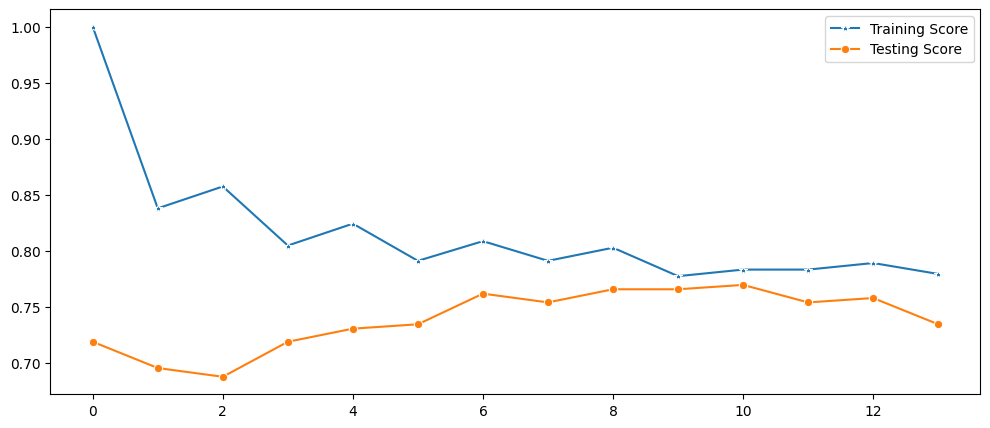

In [ ]:
plt.figure(figsize=(12,5))
pplot = sns.lineplot(training_score,marker='*',label='Training Score')
pplot = sns.lineplot(testing_score,marker='o',label='Testing Score')

In [ ]:
knn = KNeighborsClassifier(11)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76953125